#Liver Cirrhosis

##Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data_liver = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Internship/Unified/liver_cirrhosis_stage/liver_cirrhosis_stage/liver_cirrhosis.csv')
data_liver.info()
data_liver.sample(3)

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
21618,3255,C,Placebo,16109,F,N,N,N,N,0.5,268.0,4.08,9.0,1174.0,86.8,95.0,453.0,10.0,1
903,3422,C,Placebo,15574,F,N,N,Y,N,0.7,578.0,4.19,35.0,1353.0,127.1,105.0,307.0,10.3,2
14199,1212,D,D-penicillamine,12963,F,N,N,N,N,1.3,408.0,4.22,67.0,1387.0,142.6,137.0,295.0,10.1,2


##Data Inspection

In [ ]:
data_liver.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
numerical_col = data_liver._get_numeric_data().columns
categorical_col = data_liver.select_dtypes(include = ['object']).columns
print(numerical_col)
print(categorical_col)

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [ ]:
data_liver.isna().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [ ]:
data_liver.duplicated().sum()

np.int64(15361)

In [ ]:
data_liver_cleaned = data_liver.drop_duplicates()
data_liver_cleaned.duplicated().sum()

np.int64(0)

##Data Operation

In [ ]:
data_liver_cleaned

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,C,Placebo,17897,F,Y,N,Y,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
24971,4795,C,Placebo,23376,F,Y,N,Y,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
24972,3358,D,D-penicillamine,24585,F,N,Y,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
24991,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


In [ ]:
data_liver_cleaned['Age'] = (data_liver_cleaned['Age'] / 365).round(decimals=0)
data_liver_cleaned['Age'] = data_liver_cleaned['Age'].round(decimals=0)
data_liver_cleaned['Age']

<ipython-input-209-5e149bb9352f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned['Age'] = (data_liver_cleaned['Age'] / 365).round(decimals=0)
<ipython-input-209-5e149bb9352f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned['Age'] = data_liver_cleaned['Age'].round(decimals=0)


,Age
0,51.0
1,54.0
2,32.0
3,45.0
4,59.0
...,...
24963,49.0
24971,64.0
24972,67.0
24991,58.0


In [ ]:
bins = [0.0, 25.0, 35.0, 45.0, 100.0]  # Define age bins
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']  # Define labels for bins
data_liver_cleaned['Age_Group'] = pd.cut(data_liver_cleaned['Age'], bins=bins, labels=labels)
data_liver_cleaned.sample(3)

<ipython-input-210-7267d449759a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned['Age_Group'] = pd.cut(data_liver_cleaned['Age'], bins=bins, labels=labels)


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Group
1288,1375,C,Placebo,58.0,F,Y,N,Y,N,7.3,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,109.0,10.4,3,Senior
10973,1217,D,Placebo,56.0,M,Y,Y,N,Y,0.8,369.510563,2.27,43.000000,1995.000000,71.000000,124.702128,156.0,11.0,3,Senior
9455,1457,C,Placebo,41.0,F,Y,N,Y,N,0.5,227.000000,3.61,40.000000,676.000000,83.000000,120.000000,120.0,11.0,3,Middle-aged


##Data Visualization

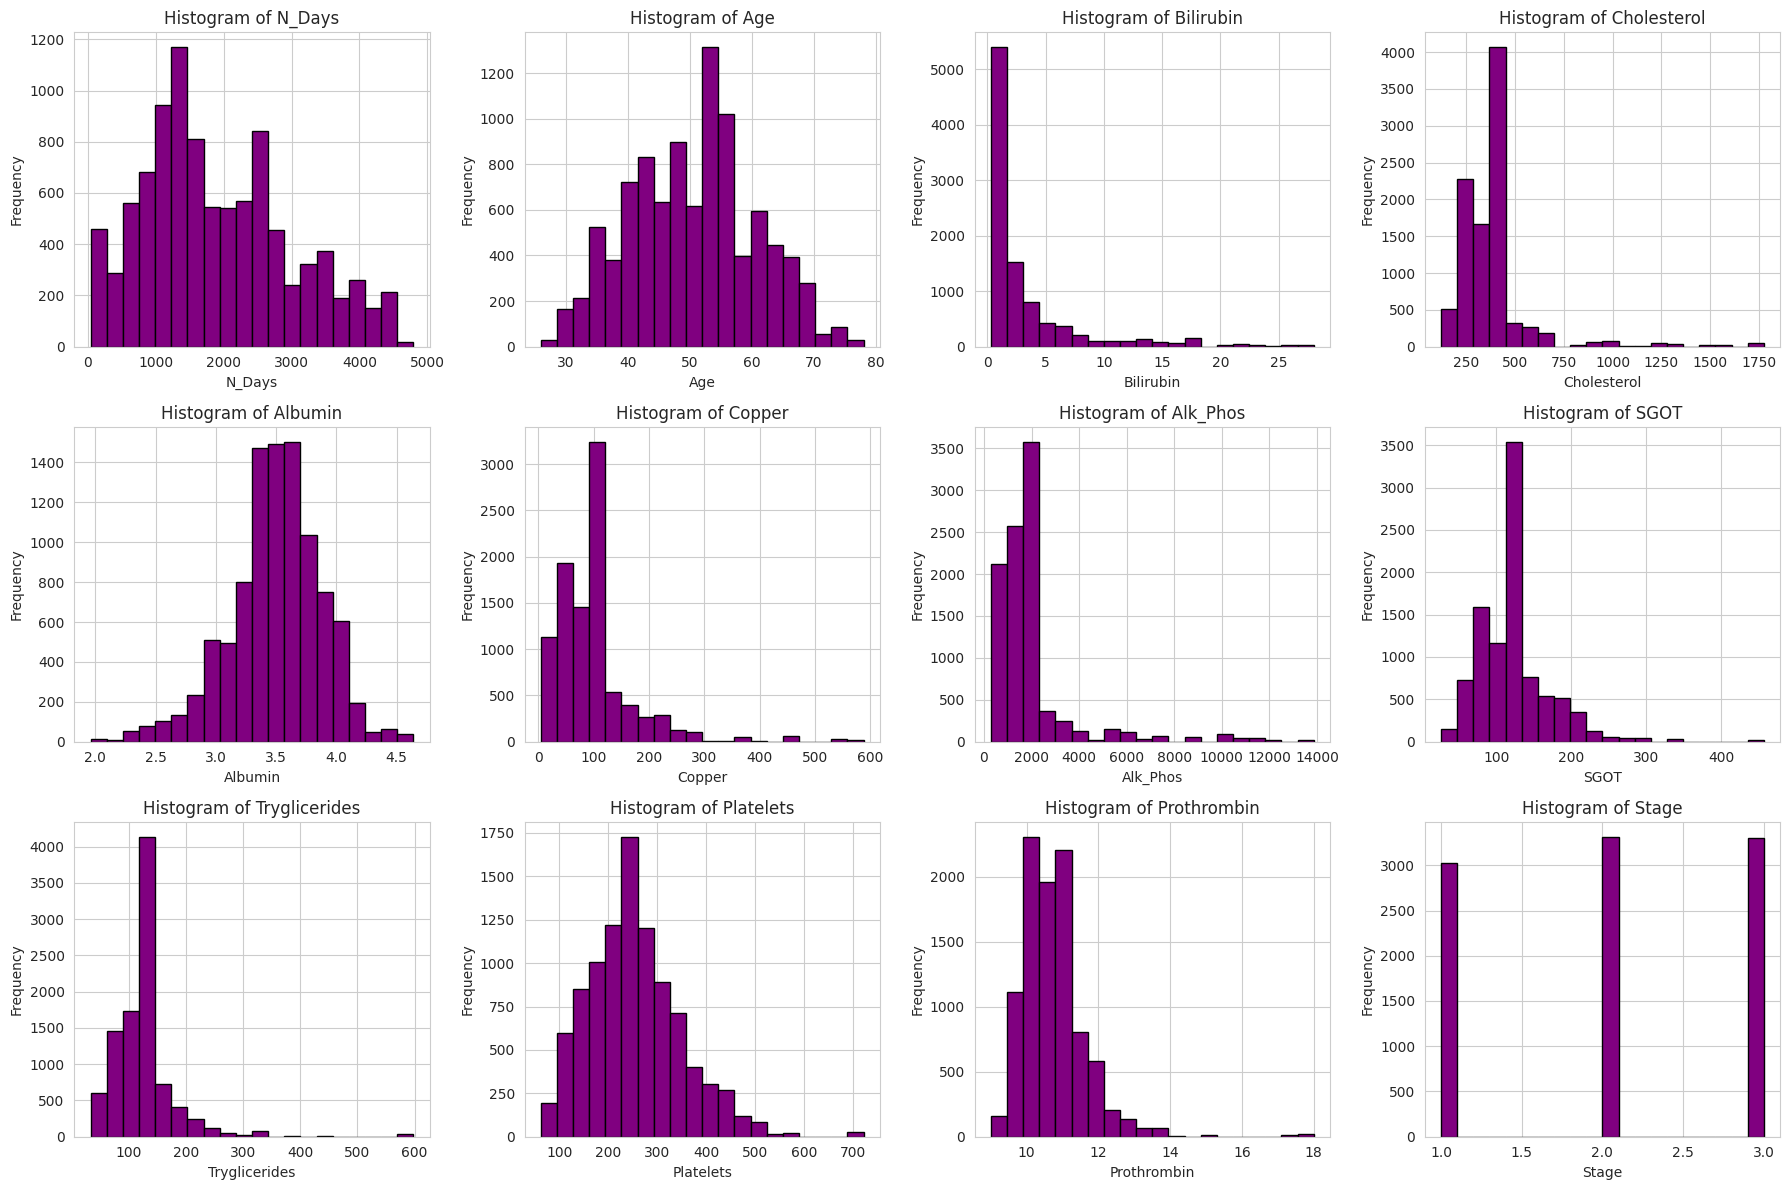

In [ ]:
numeric_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

fig, axs = plt.subplots(3, 4, figsize=(18, 12))

axs = axs.flatten()

for i, column in enumerate(numeric_columns):
    axs[i].hist(data_liver_cleaned[column], bins=20, color='purple', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

for j in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

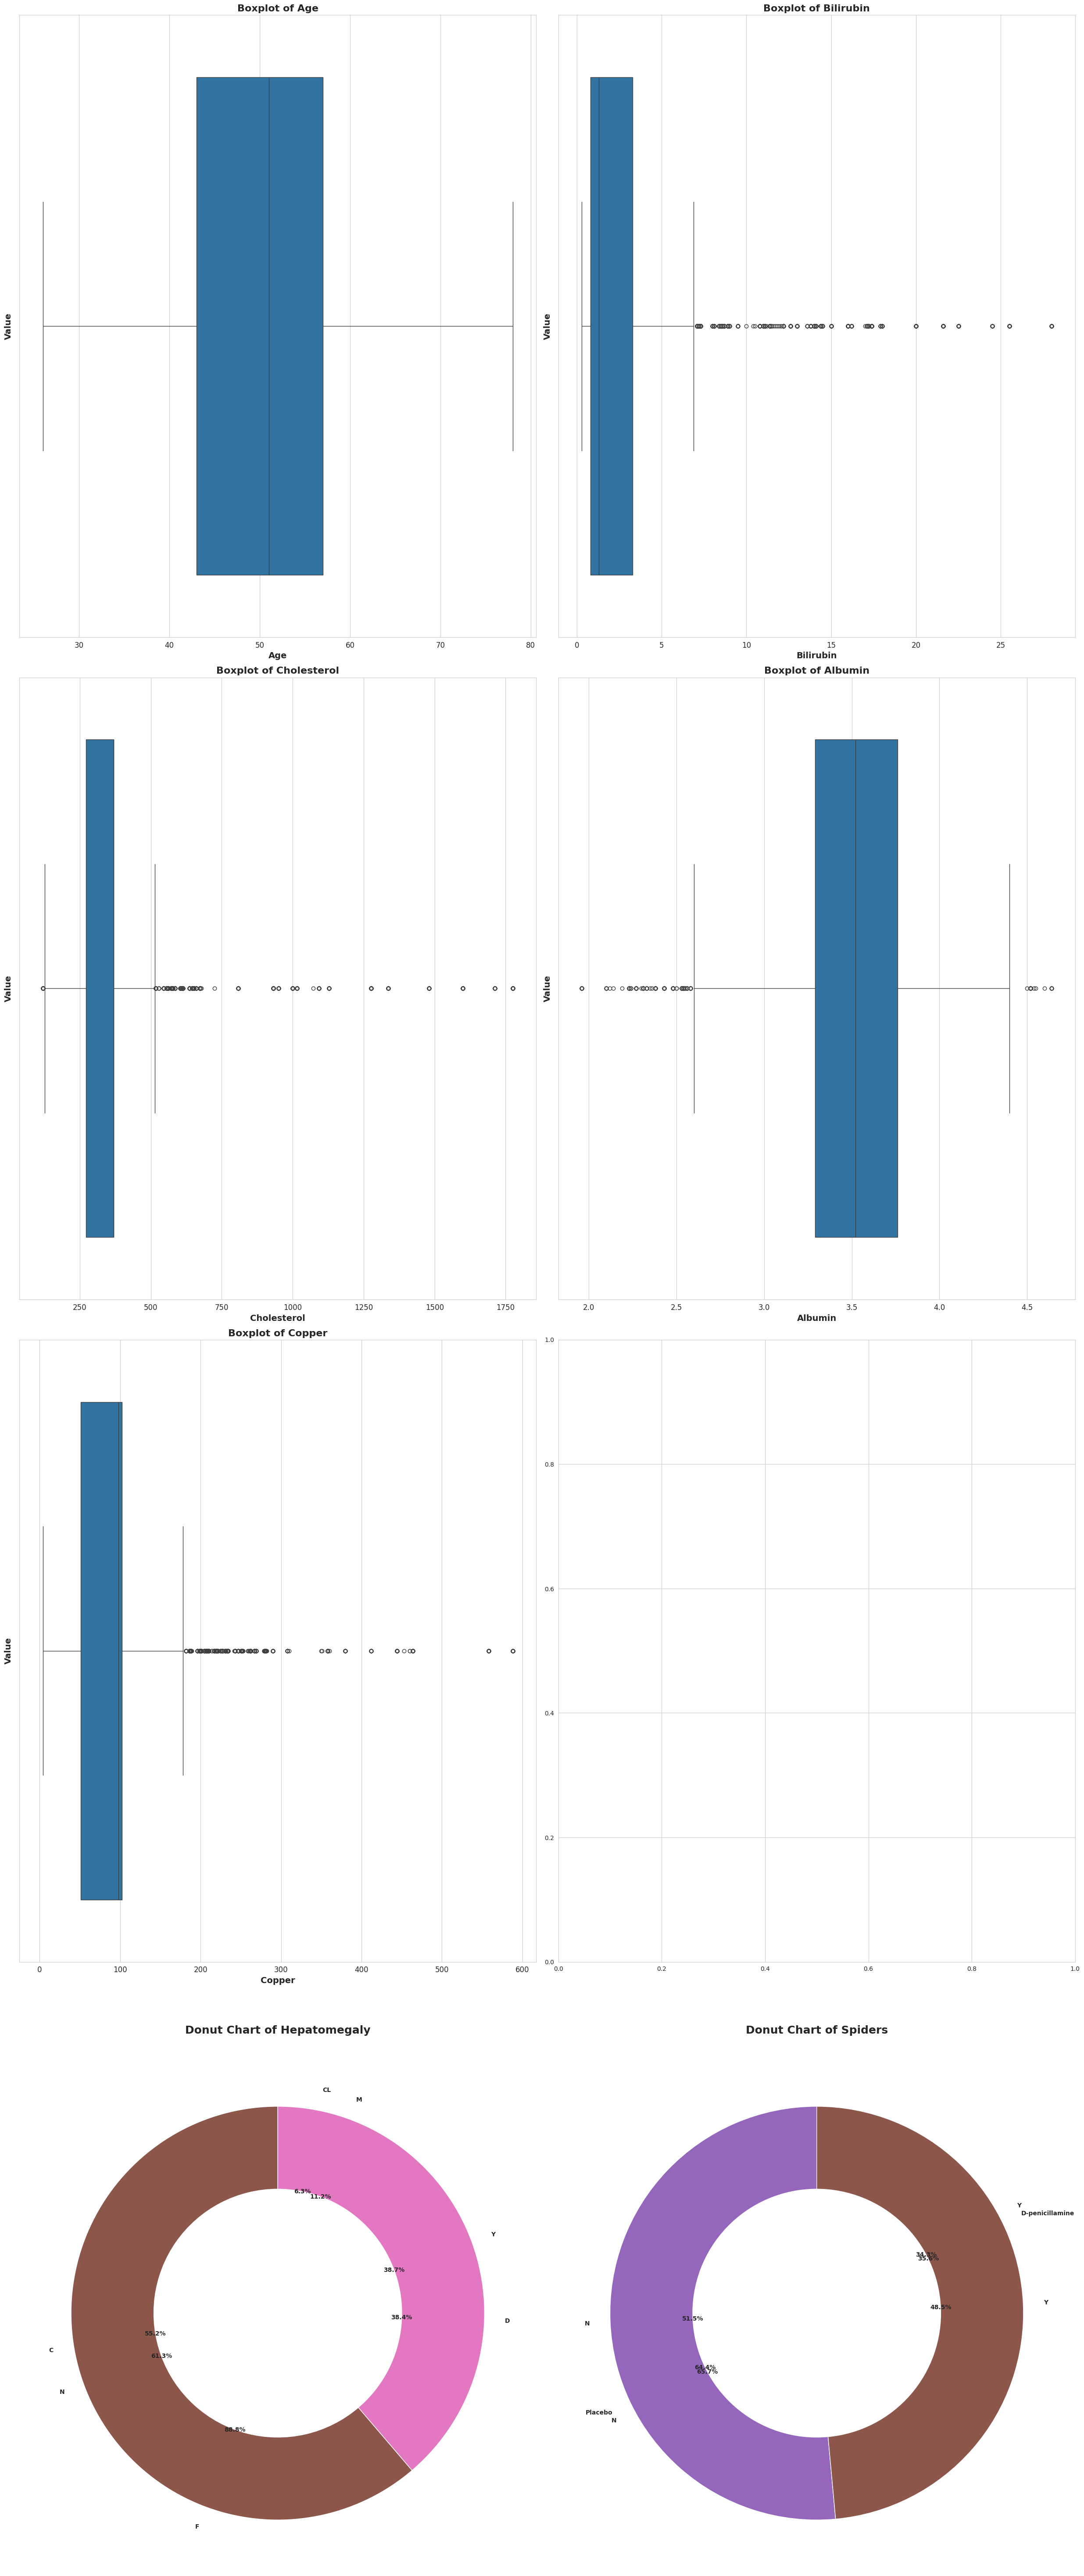

In [ ]:
import seaborn as sns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Set the style for seaborn
sns.set_style("whitegrid")

# Calculate the number of subplot rows needed for numerical columns
num_numerical_cols = len(numerical_columns)
num_subplot_rows = (num_numerical_cols + 1) // 2  # Ensure at least one row

# Create a figure and subplots
fig, axes = plt.subplots(num_subplot_rows + 1, 2, figsize=(25, 15 * (num_subplot_rows + 1)))

# Plot boxplots for numerical columns
for i, col in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=data_liver_cleaned[col], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
    axes[row_index, col_index].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[row_index, col_index].set_ylabel('Value', fontsize=14, fontweight='bold')
    axes[row_index, col_index].tick_params(axis='both', labelsize=12)

# Plot donut charts for categorical columns
for i, col in enumerate(categorical_columns):
    row_index = num_subplot_rows
    col_index = i % 2
    category_counts = data_liver_cleaned[col].value_counts()
    category_labels = category_counts.index
    category_sizes = category_counts.values
    axes[row_index, col_index].pie(category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))
    axes[row_index, col_index].set_title(f'Donut Chart of {col}', fontsize=18, fontweight='bold', pad=35)
    axes[row_index, col_index].tick_params(axis='both', labelsize=18)
    for text in axes[row_index, col_index].texts:
        text.set_fontweight('bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##Outlier Handling

In [ ]:
data_liver_cleaned.info()
#data_liver_cleaned.sample(3)
data_liver_cleaned._get_numeric_data().columns

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 24992
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         9639 non-null   int64   
 1   Status         9639 non-null   object  
 2   Drug           9639 non-null   object  
 3   Age            9639 non-null   float64 
 4   Sex            9639 non-null   object  
 5   Ascites        9639 non-null   object  
 6   Hepatomegaly   9639 non-null   object  
 7   Spiders        9639 non-null   object  
 8   Edema          9639 non-null   object  
 9   Bilirubin      9639 non-null   float64 
 10  Cholesterol    9639 non-null   float64 
 11  Albumin        9639 non-null   float64 
 12  Copper         9639 non-null   float64 
 13  Alk_Phos       9639 non-null   float64 
 14  SGOT           9639 non-null   float64 
 15  Tryglicerides  9639 non-null   float64 
 16  Platelets      9639 non-null   float64 
 17  Prothrombin    9639 non-null   float6

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
numerical_col = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
data_liver_cleaned[numerical_col]

,Age,Bilirubin,Cholesterol,Albumin,Copper
0,51.0,0.5,149.000000,4.04,227.000000
1,54.0,0.5,219.000000,3.93,22.000000
2,32.0,0.5,320.000000,3.54,51.000000
3,45.0,0.7,255.000000,3.74,23.000000
4,59.0,1.9,486.000000,3.54,74.000000
...,...,...,...,...,...
24963,49.0,0.7,369.510563,3.49,97.648387
24971,64.0,1.8,369.510563,3.24,97.648387
24972,67.0,2.1,262.000000,3.48,58.000000
24991,58.0,0.9,346.000000,3.40,81.000000


using quantile

In [ ]:
#bilirubin
bilirubin_q1 = data_liver_cleaned['Bilirubin'].quantile(0.25)
bilirubin_q3 = data_liver_cleaned['Bilirubin'].quantile(0.75)
#cholesterol
cholesterol_q1 = data_liver_cleaned['Cholesterol'].quantile(0.25)
cholesterol_q3 = data_liver_cleaned['Cholesterol'].quantile(0.75)
#albumin
albumin_q1 = data_liver_cleaned['Albumin'].quantile(0.25)
albumin_q3 = data_liver_cleaned['Albumin'].quantile(0.75)
#copper
copper_q1 = data_liver_cleaned['Copper'].quantile(0.25)
copper_q3 = data_liver_cleaned['Copper'].quantile(0.75)
print(bilirubin_q1, bilirubin_q3)
print(cholesterol_q1, cholesterol_q3)
print(albumin_q1, albumin_q3)
print(copper_q1, copper_q3)

0.8 3.3
271.0 369.5105634
3.29 3.76
51.0 102.0


In [ ]:
data_liver_cleaned.loc[(data_liver_cleaned['Bilirubin'] < 0.8) | (data_liver_cleaned['Bilirubin'] > 3.3), 'Bilirubin'] = np.nan
data_liver_cleaned.loc[(data_liver_cleaned['Cholesterol'] < 271.0) | (data_liver_cleaned['Cholesterol'] > 369.6), 'Cholesterol'] = np.nan
data_liver_cleaned.loc[(data_liver_cleaned['Albumin'] < 3.29) | (data_liver_cleaned['Albumin'] > 3.76), 'Albumin'] = np.nan
data_liver_cleaned.loc[(data_liver_cleaned['Copper'] < 51.0) | (data_liver_cleaned['Copper'] > 102.0), 'Copper'] = np.nan

In [ ]:
data_liver_cleaned

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Group
0,2221,C,Placebo,51.0,F,N,Y,N,N,NaN,NaN,NaN,NaN,598.000000,52.700000,57.000000,256.0,9.9,1,Senior
1,1230,C,Placebo,54.0,M,Y,N,Y,N,NaN,NaN,NaN,NaN,663.000000,45.000000,75.000000,220.0,10.8,2,Senior
2,4184,C,Placebo,32.0,F,N,N,N,N,NaN,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2,Adult
3,2090,D,Placebo,45.0,F,N,N,N,N,NaN,NaN,3.74,NaN,1024.000000,77.500000,58.000000,151.0,10.2,2,Middle-aged
4,2105,D,Placebo,59.0,F,N,Y,N,N,1.9,NaN,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,C,Placebo,49.0,F,Y,N,Y,N,NaN,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1,Senior
24971,4795,C,Placebo,64.0,F,Y,N,Y,N,1.8,369.510563,NaN,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1,Senior
24972,3358,D,D-penicillamine,67.0,F,N,Y,N,N,2.1,NaN,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3,Senior
24991,4365,C,D-penicillamine,58.0,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2,Senior


In [ ]:
data_liver_cleaned['Bilirubin'] = data_liver_cleaned['Bilirubin'].fillna(data_liver_cleaned['Bilirubin'].median())
data_liver_cleaned['Cholesterol'] = data_liver_cleaned['Cholesterol'].fillna(data_liver_cleaned['Cholesterol'].median())
data_liver_cleaned['Albumin'] = data_liver_cleaned['Albumin'].fillna(data_liver_cleaned['Albumin'].median())
data_liver_cleaned['Copper'] = data_liver_cleaned['Copper'].fillna(data_liver_cleaned['Copper'].median())

<ipython-input-222-d234ca07dc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned['Bilirubin'] = data_liver_cleaned['Bilirubin'].fillna(data_liver_cleaned['Bilirubin'].median())
<ipython-input-222-d234ca07dc1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned['Cholesterol'] = data_liver_cleaned['Cholesterol'].fillna(data_liver_cleaned['Cholesterol'].median())
<ipython-input-222-d234ca07dc1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
data_liver_cleaned

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Group
0,2221,C,Placebo,51.0,F,N,Y,N,N,1.3,369.510563,3.52,97.648387,598.000000,52.700000,57.000000,256.0,9.9,1,Senior
1,1230,C,Placebo,54.0,M,Y,N,Y,N,1.3,369.510563,3.52,97.648387,663.000000,45.000000,75.000000,220.0,10.8,2,Senior
2,4184,C,Placebo,32.0,F,N,N,N,N,1.3,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2,Adult
3,2090,D,Placebo,45.0,F,N,N,N,N,1.3,369.510563,3.74,97.648387,1024.000000,77.500000,58.000000,151.0,10.2,2,Middle-aged
4,2105,D,Placebo,59.0,F,N,Y,N,N,1.9,369.510563,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,C,Placebo,49.0,F,Y,N,Y,N,1.3,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1,Senior
24971,4795,C,Placebo,64.0,F,Y,N,Y,N,1.8,369.510563,3.52,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1,Senior
24972,3358,D,D-penicillamine,67.0,F,N,Y,N,N,2.1,369.510563,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3,Senior
24991,4365,C,D-penicillamine,58.0,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2,Senior


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
le = LabelEncoder()
for col in data_liver_cleaned.columns:
    if data_liver_cleaned[col].dtype == 'category' or data_liver_cleaned[col].dtype == 'object':
        data_liver_cleaned[col] = le.fit_transform(data_liver_cleaned[col])

<ipython-input-226-8592fca2ed80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned[col] = le.fit_transform(data_liver_cleaned[col])
<ipython-input-226-8592fca2ed80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liver_cleaned[col] = le.fit_transform(data_liver_cleaned[col])
<ipython-input-226-8592fca2ed80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
from sklearn.model_selection import train_test_split
# Define the features and the target
X = data_liver_cleaned.drop(columns=['Stage'], axis=1)
y = data_liver_cleaned['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
# Initialize and train the SVC classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test_scaled)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))

# Evaluate the classifier
print("SVC Classifier Report:\n", classification_report(y_test, y_pred_svc))

Accuracy Score:
 0.7375518672199171
SVC Classifier Report:
               precision    recall  f1-score   support

           1       0.73      0.73      0.73       617
           2       0.68      0.67      0.67       640
           3       0.80      0.81      0.81       671

    accuracy                           0.74      1928
   macro avg       0.74      0.74      0.74      1928
weighted avg       0.74      0.74      0.74      1928



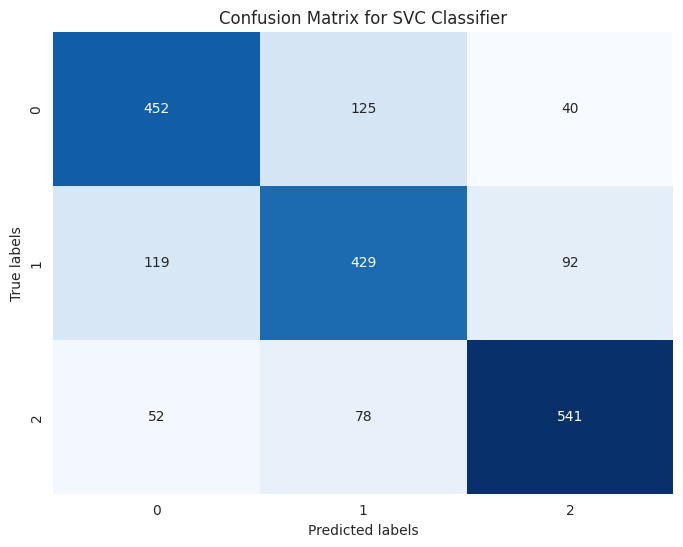

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical features
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Feature Selection
# SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif)

# Combine preprocessing and feature selection steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define models and pipelines
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('selector', selector),
                                      ('model', model)])

# Define hyperparameters for each model
param_grids = {
    'DecisionTree': {'selector__k': [2, 4, 6]},
    'RandomForest': {'selector__k': [2, 4, 6], 'model__n_estimators': [100, 200, 300]},
    'KNN': {'selector__k': [2, 4, 6], 'model__n_neighbors': [3, 5, 7]}
}

# Perform GridSearchCV for each model
results = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    results[name] = grid_search

# Evaluate models
for name, result in results.items():
    print(f"Model: {name}")
    print("Best parameters:", result.best_params_)
    print("Train Accuracy:", result.best_score_)
    y_pred = result.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model: DecisionTree
Best parameters: {'selector__k': 2}
Train Accuracy: 0.7936722725029902
Test Accuracy: 0.799792531120332
Precision: 0.8000019705124405
Recall: 0.799792531120332
Confusion Matrix:
 [[476  92  49]
 [ 93 498  49]
 [ 48  55 568]]
Model: RandomForest
Best parameters: {'model__n_estimators': 300, 'selector__k': 6}
Train Accuracy: 0.8498264620019451
Test Accuracy: 0.8506224066390041
Precision: 0.850833727155327
Recall: 0.8506224066390041
Confusion Matrix:
 [[510  65  42]
 [ 49 542  49]
 [ 35  48 588]]
Model: KNN
Best parameters: {'model__n_neighbors': 3, 'selector__k': 4}
Train Accuracy: 0.7469831118822043
Test Accuracy: 0.754149377593361
Precision: 0.7566565483392297
Recall: 0.754149377593361
Confusion Matrix:
 [[468  96  53]
 [125 458  57]
 [ 75  68 528]]


Model: DecisionTree


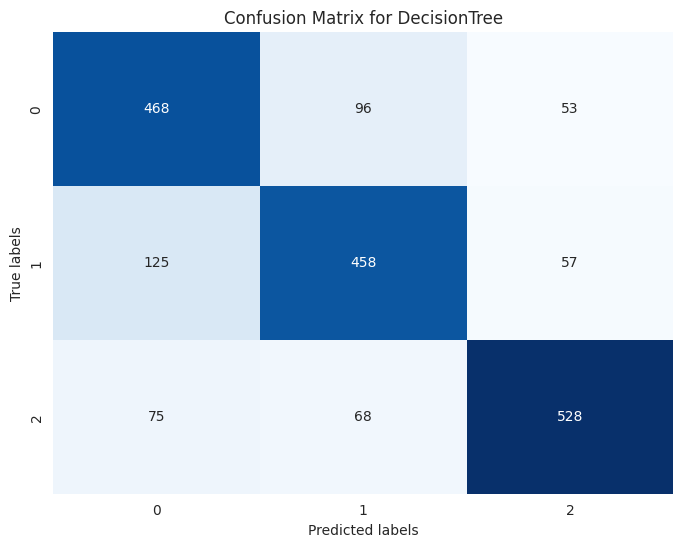

Model: RandomForest


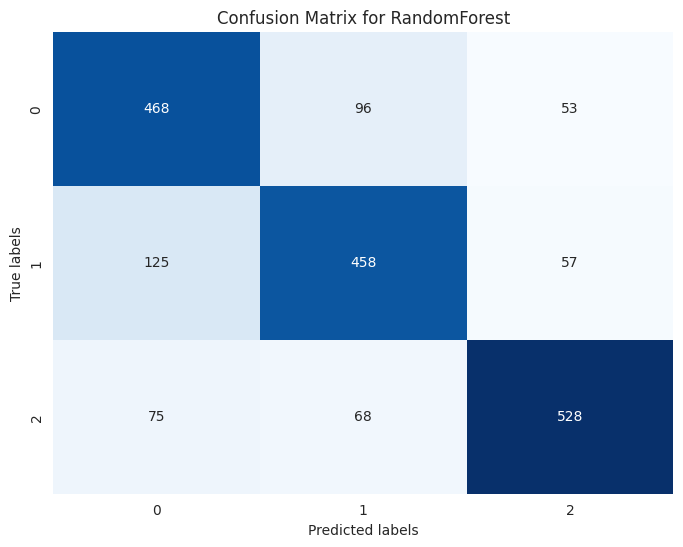

Model: KNN


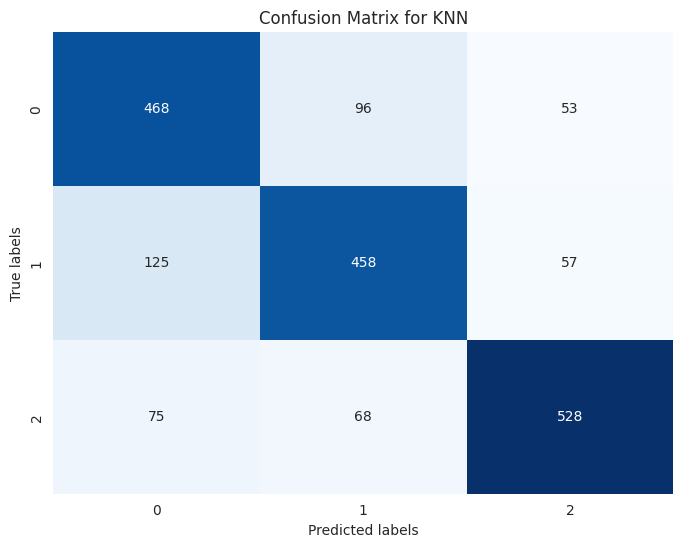

In [ ]:
# Evaluate models
for name, result in results.items():
    print(f"Model: {name}")
    cm = confusion_matrix(y_test, y_pred)
    # Display confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()